In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import matplotlib.dates as mpd

%matplotlib inline

x = np.random.normal(size=100) #ランダムデータをnumpy arrayとして作る

titanic = sns.load_dataset("titanic") ##kaggleで有名な、タイタニック号の生死者データ
tips = sns.load_dataset("tips")  ## お店の食事時間と会計総額とチップの関係のデータ
iris = sns.load_dataset("iris")  ## Rでお馴染みのアヤメの統計データ

In [6]:
x

array([-0.36066368, -0.4236896 , -0.29390039, -0.35970646,  0.74169385,
       -1.06174766,  0.52211618,  0.28880208, -0.90805249,  0.36202859,
        1.47300535,  1.79209364,  1.59120319,  1.45411398, -0.24109118,
       -0.42422985, -1.45700028, -0.40255424,  1.02508364, -0.16583486,
       -0.26494755,  0.27015753,  0.87094751,  0.50722543,  0.65922379,
        0.97049615, -0.52073707, -0.70269986, -0.59539024,  0.51787447,
       -0.36789972, -1.45308023,  0.80461777, -1.4003353 ,  0.523517  ,
        1.264588  ,  1.22275159,  2.00929262,  0.42118033, -0.23331535,
       -0.10597529,  1.01712989, -0.2456761 ,  0.48827885, -0.2905986 ,
       -0.04847111, -1.22031077,  0.2071703 ,  0.03929889, -0.41293931,
        0.43136239,  0.54140214, -0.26858516,  0.45065859,  1.43128261,
       -0.23118549,  1.17346568, -0.28441071,  0.42440476,  0.72889419,
       -0.5764125 , -1.53269679,  0.2664796 , -1.02317561, -0.9207511 ,
        1.89345055, -0.43879285, -0.47242907, -1.00627739, -1.14

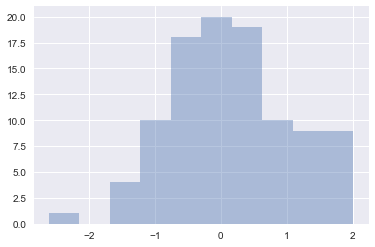

In [9]:
sns.distplot(x, kde=False, rug=False, bins=10) 

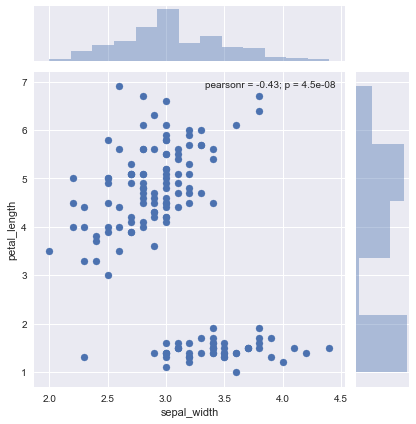

In [10]:
sns.jointplot('sepal_width', 'petal_length', data=iris)

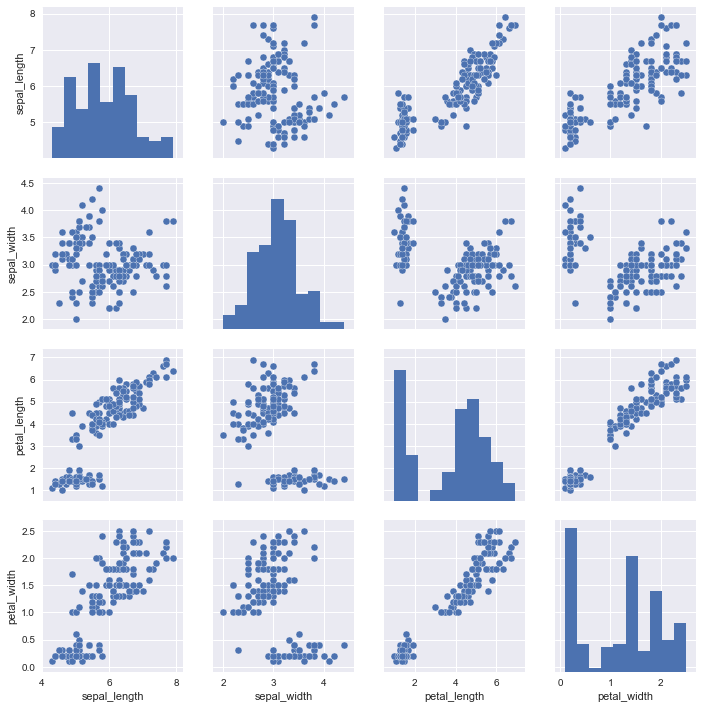

In [11]:
sns.pairplot(iris)

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
import sys

In [17]:
sys.path.append(r"C:\Users\Hiroshi.Hiromax")

In [77]:
df = pd.read_csv('temp_data.csv', encoding='shift-jis', index_col=0)

In [78]:
#df.columns = ['Tokyo', 'Sapporo', 'Fukuoka']
df.index = pd.to_datetime(df.index)
df.head()

,東京,札幌,博多
2017-01-01,7.4,-2.0,7.6
2017-01-02,7.2,0.1,7.7
2017-01-03,8.0,-1.2,8.6
2017-01-04,8.5,-2.5,8.7
2017-01-05,6.7,-4.1,8.7


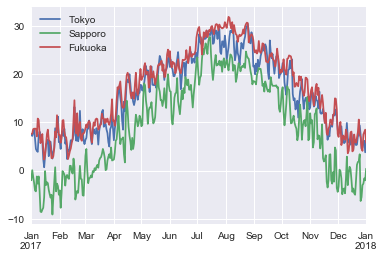

In [41]:
df.plot()

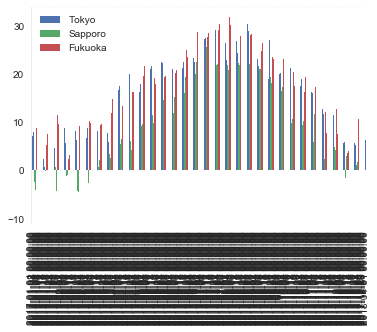

In [42]:
df.plot.bar()

In [79]:
monthly = df.groupby(pd.Grouper(level=0, freq='M')).mean()
monthly

,東京,札幌,博多
2017-01-31,5.832258,-3.896774,6.806452
2017-02-28,6.928571,-2.032143,7.528571
2017-03-31,8.493548,1.448387,9.954839
2017-04-30,14.653333,7.736667,16.250000
2017-05-31,20.006452,14.374194,20.696774
2017-06-30,22.010000,15.980000,22.990000
2017-07-31,27.319355,22.851613,28.954839
2017-08-31,26.448387,21.658065,29.051613
2017-09-30,22.806667,17.743333,23.863333
2017-10-31,16.825806,11.274194,19.554839


In [47]:
monthly.index = monthly.index.format()

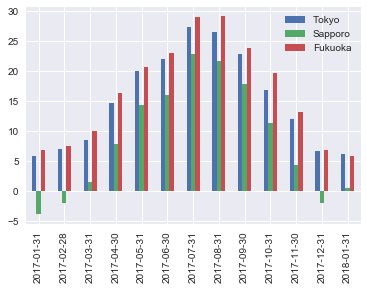

In [48]:
monthly.plot.bar()

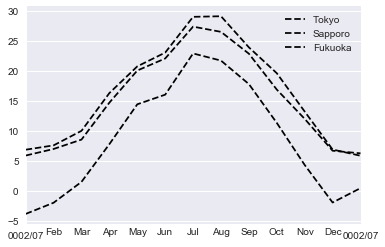

In [69]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
monthly.plot(ax=ax, style='k--')
datefmt = dates.DateFormatter('%Y/%m')
ax.xaxis.set_major_formatter(datefmt)

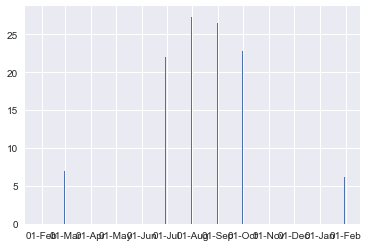

In [80]:
ax = plt.subplot()
ax.bar(monthly.index, monthly['東京'])
ax.xaxis.set_major_locator(mpd.MonthLocator())
ax.xaxis.set_major_formatter(mpd.DateFormatter('%d-%b'))
plt.show()

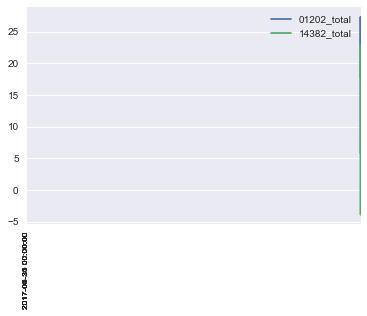

In [62]:
h1, =plt.plot(monthly['Tokyo'][0:9],label='01202_total')
h2, =plt.plot(monthly['Sapporo'][0:9],label='14382_total')
plt.xticks(range(9),monthly.index[0:9],rotation=90,size='small')
plt.legend(handles=[h1,h2])
plt.show()